## EDA and Preprocessing Section

In [1]:
# Must have libraries
import pandas as pd
import numpy as np

In [2]:
# First need to read in the leader and athlete datasets
athletes = pd.read_csv("bgadoci-crossfit-data/athletes.csv")
leader = pd.read_csv("bgadoci-crossfit-data/leaderboard.15.csv")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Join on athlete ID
df = pd.merge(athletes, leader, on='athlete_id', how='inner')
# Make sure it looks okay
df.head()

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,schedule,howlong,retrieved_datetime_x,year,division,stage,rank,score,retrieved_datetime_y,scaled
0,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,5.0,44119.0,771.0,2015-03-31 21:47:26,0
1,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,1.0,43966.0,130.0,2015-03-31 23:02:54,0
2,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,1.1,32461.0,225.0,2015-03-31 23:30:57,0
3,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,2.0,58455.0,78.0,2015-03-31 23:53:31,0
4,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,3.0,30179.0,314.0,2015-04-01 00:27:51,0


In [4]:
# Drop all of our na's and check for unique values in each column
testing = df.dropna()
testing.nunique()

athlete_id               679
name                     679
region                    17
team                     574
affiliate                567
gender                     2
age                       38
height                    23
weight                   120
fran                     313
helen                    335
grace                    270
filthy50                 503
fgonebad                 247
run400                    95
run5k                    381
candj                    120
snatch                   113
deadlift                 141
backsq                   133
pullups                   80
eat                       23
train                     45
background                18
experience                43
schedule                  51
howlong                   12
retrieved_datetime_x     675
year                       1
division                   2
stage                      6
rank                    2427
score                    775
retrieved_datetime_y    2211
scaled        

#### NOTE: We noticed several variables had absurd responses: 800,000 pullups, 5,000 lb. back squat etc... So we used our best judgement to determine where the cutoff for a reasonable score on each continuous variable might be.

In [5]:
# How many rows we have before
print(len(testing))

3802


In [6]:
# Filtered Dataframes
testing = testing[testing['fran'] < 1250]
testing = testing[testing['helen'] < 2000]
testing = testing[testing['grace'] < 1000]
testing = testing[testing['filthy50'] < 4000]
testing = testing[testing['fgonebad'] < 625]
testing = testing[testing['run400'] < 200]
testing = testing[testing['run5k'] < 3000]
testing = testing[testing['candj'] < 500]
testing = testing[testing['snatch'] < 350]
testing = testing[testing['deadlift'] < 750]
testing = testing[testing['backsq'] < 750]
testing = testing[testing['pullups'] < 74]

In [7]:
# Number of rows now
print(len(testing))

3625


<AxesSubplot:>

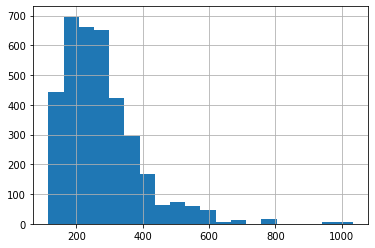

In [8]:
# Histogram to illustrate the distribution looks okay 
testing.fran.hist(bins = 20)

In [9]:
#athletes.eat.unique()

Possible values for eat:
* I eat quality foods but don't measure the amount
* I eat strict Paleo
* I eat 1-3 full cheat meals per week
* I eat whatever is convenient
* I weigh and measure my food

In [10]:
#athletes.train.unique()

Possible values for train:
* I workout mostly at a CrossFit Affiliate
* I have a coach who determines my programming
* I record my workouts
* I incorporate CrossFit.com workouts
* I write my own programming
* I workout mostly at home, work, or a traditional gym



In [11]:
#athletes.background.unique()

Possible values for background:
* I played youth or high school level sports
* I regularly play recreational sports
* I played college sports
* I have no athletic background besides CrossFit
* I played professional sports

In [12]:
#athletes.experience.unique()

Possible values for experience: 
* I began CrossFit with a coach (e.g. at an affiliate)
* I have attended one or more specialty courses
* I have had a life changing experience due to CrossFit
* I began CrossFit by trying it alone (without a coach)
* I have completed the CrossFit Level 1 certificate course
* I train other people

In [13]:
#athletes.schedule.unique()

Possible values for schedule:
* I do multiple workouts in a day 2x a week
* I usually only do 1 workout a day
* I strictly schedule my rest days
* I typically rest 4 or more days per month
* I do multiple workouts in a day 3+ times a week
* I typically rest fewer than 4 days per month
* I do multiple workouts in a day 1x a week

#### The train, background, experience, schedule and eat columns all need to be split up into different variables.

In [14]:
athletes = testing

In [15]:
# calculate dummies for train column
athletes = athletes.dropna()
a = athletes["train"].str.split('|').explode().to_frame()
cols = a["train"].drop_duplicates(keep='first').tolist()

athletes = pd.concat([athletes, pd.crosstab(a.index, a["train"])[cols]], axis=1)

athletes.drop('train', axis=1, inplace=True)    
athletes.drop('', axis=1, inplace=True)
athletes

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,score,retrieved_datetime_y,scaled,I workout mostly at a CrossFit Affiliate,"I workout mostly at home, work, or a traditional gym",I have a coach who determines my programming,I incorporate CrossFit.com workouts,I write my own programming,I record my workouts,Decline to answer
82091,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,498.0,2015-03-31 21:45:10,0,1,1,1,1,1,1,0
82092,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,170.0,2015-03-31 22:59:41,0,1,1,1,1,1,1,0
82093,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,240.0,2015-03-31 23:28:06,0,1,1,1,1,1,1,0
82094,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,244.0,2015-03-31 23:52:32,0,1,1,1,1,1,1,0
82095,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,340.0,2015-04-01 00:17:05,0,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384129,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,131.0,2015-03-31 23:23:15,1,1,0,0,0,0,1,0
1384130,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,115.0,2015-03-31 23:48:30,1,1,0,0,0,0,1,0
1384131,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,135.0,2015-04-01 00:11:44,1,1,0,0,0,0,1,0
1384132,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,533.0,2015-04-01 00:40:56,1,1,0,0,0,0,1,0


In [16]:
# calculate dummies for background column
a = athletes["background"].str.split('|').explode().to_frame()
cols = a["background"].drop_duplicates(keep='first').tolist()

athletes = pd.concat([athletes, pd.crosstab(a.index, a["background"])[cols]], axis=1)

athletes.drop('background', axis=1, inplace=True)    
athletes.drop('', axis=1, inplace=True)
athletes


,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,I incorporate CrossFit.com workouts,I write my own programming,I record my workouts,Decline to answer,I played youth or high school level sports,I regularly play recreational sports,I played college sports,I played professional sports,I have no athletic background besides CrossFit,Decline to answer
82091,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,1,1,1,0,1,1,0,0,0,0
82092,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,1,1,1,0,1,1,0,0,0,0
82093,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,1,1,1,0,1,1,0,0,0,0
82094,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,1,1,1,0,1,1,0,0,0,0
82095,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,1,1,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384129,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,0,1,0,0,1,0,0,1,0
1384130,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,0,1,0,0,1,0,0,1,0
1384131,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,0,1,0,0,1,0,0,1,0
1384132,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,0,1,0,0,1,0,0,1,0


In [17]:
# calculate dummies for experience column
a = athletes["experience"].str.split('|').explode().to_frame()
cols = a["experience"].drop_duplicates(keep='first').tolist()

athletes = pd.concat([athletes, pd.crosstab(a.index, a["experience"])[cols]], axis=1)

athletes.drop('experience', axis=1, inplace=True)    
athletes.drop('', axis=1, inplace=True)
athletes

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,I played professional sports,I have no athletic background besides CrossFit,Decline to answer,I began CrossFit by trying it alone (without a coach),I have completed the CrossFit Level 1 certificate course,I train other people,I have attended one or more specialty courses,I have had a life changing experience due to CrossFit,I began CrossFit with a coach (e.g. at an affiliate),Decline to answer
82091,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,1,1,1,0,0,0,0
82092,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,1,1,1,0,0,0,0
82093,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,1,1,1,0,0,0,0
82094,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,1,1,1,0,0,0,0
82095,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384129,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,1,0,0,0,0,0,0,1,0
1384130,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,1,0,0,0,0,0,0,1,0
1384131,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,1,0,0,0,0,0,0,1,0
1384132,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,1,0,0,0,0,0,0,1,0


In [18]:
# calculate dummies for schedule column
a = athletes["schedule"].str.split('|').explode().to_frame()
cols = a["schedule"].drop_duplicates(keep='first').tolist()

athletes = pd.concat([athletes, pd.crosstab(a.index, a["schedule"])[cols]], axis=1)

athletes.drop('schedule', axis=1, inplace=True)    
athletes.drop('', axis=1, inplace=True)
athletes

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,I began CrossFit with a coach (e.g. at an affiliate),Decline to answer,I do multiple workouts in a day 3+ times a week,I typically rest fewer than 4 days per month,I typically rest 4 or more days per month,I usually only do 1 workout a day,I do multiple workouts in a day 1x a week,I strictly schedule my rest days,I do multiple workouts in a day 2x a week,Decline to answer
82091,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,1,1,0,0,0,0,0,0
82092,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,1,1,0,0,0,0,0,0
82093,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,1,1,0,0,0,0,0,0
82094,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,1,1,0,0,0,0,0,0
82095,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384129,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,1,0,0,0,1,1,0,0,0,0
1384130,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,1,0,0,0,1,1,0,0,0,0
1384131,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,1,0,0,0,1,1,0,0,0,0
1384132,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,1,0,0,0,1,1,0,0,0,0


In [19]:
# calculate dummies for eat column
a = athletes["eat"].str.split('|').explode().to_frame()
cols = a["eat"].drop_duplicates(keep='first').tolist()

athletes = pd.concat([athletes, pd.crosstab(a.index, a["eat"])[cols]], axis=1)

athletes.drop('eat', axis=1, inplace=True)    
athletes.drop('', axis=1, inplace=True)
athletes

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,I do multiple workouts in a day 1x a week,I strictly schedule my rest days,I do multiple workouts in a day 2x a week,Decline to answer,I eat quality foods but don't measure the amount,I eat 1-3 full cheat meals per week,I eat whatever is convenient,I weigh and measure my food,I eat strict Paleo,Decline to answer
82091,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0
82092,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0
82093,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0
82094,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0
82095,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384129,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,0,0,0,0,0,1,0,1,0
1384130,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,0,0,0,0,0,1,0,1,0
1384131,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,0,0,0,0,0,1,0,1,0
1384132,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,0,0,0,0,0,1,0,1,0


In [20]:
athletes.head()

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,I do multiple workouts in a day 1x a week,I strictly schedule my rest days,I do multiple workouts in a day 2x a week,Decline to answer,I eat quality foods but don't measure the amount,I eat 1-3 full cheat meals per week,I eat whatever is convenient,I weigh and measure my food,I eat strict Paleo,Decline to answer
82091,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0
82092,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0
82093,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0
82094,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0
82095,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0


In [21]:
# Get dummy variables for gender
athletes["male"] = pd.get_dummies(athletes.gender)["Male"]

In [22]:
athletes.drop('athlete_id', axis=1)

,name,region,team,affiliate,gender,age,height,weight,fran,helen,...,I strictly schedule my rest days,I do multiple workouts in a day 2x a week,Decline to answer,I eat quality foods but don't measure the amount,I eat 1-3 full cheat meals per week,I eat whatever is convenient,I weigh and measure my food,I eat strict Paleo,Decline to answer,male
82091,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,441.0,...,0,0,0,1,0,0,0,0,0,1
82092,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,441.0,...,0,0,0,1,0,0,0,0,0,1
82093,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,441.0,...,0,0,0,1,0,0,0,0,0,1
82094,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,441.0,...,0,0,0,1,0,0,0,0,0,1
82095,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,441.0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384129,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,962.0,...,0,0,0,0,0,1,0,1,0,0
1384130,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,962.0,...,0,0,0,0,0,1,0,1,0,0
1384131,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,962.0,...,0,0,0,0,0,1,0,1,0,0
1384132,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,962.0,...,0,0,0,0,0,1,0,1,0,0


In [23]:
# Get rid of variables that we don't need
X = athletes.drop(['rank', 'athlete_id', 'name', 'region', 'team', 'affiliate', 'howlong', 'retrieved_datetime_x','retrieved_datetime_y', 'gender'], axis=1)
y = athletes["rank"]

In [24]:
# Train Test split
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=801)

## Decision tree model

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
# split train and test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=801)
# done above

In [27]:
def PipeTree(max_depth=None):
    return make_pipeline(StandardScaler(),
                         DecisionTreeRegressor(max_depth=max_depth, random_state=0))

In [28]:
pipe = PipeTree()
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=0))])

In [29]:
pipe = PipeTree(max_depth=5)
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=5, random_state=0))])

In [30]:
pipe = PipeTree(max_depth=3)
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=3, random_state=0))])

In [31]:
pipe.named_steps

{'standardscaler': StandardScaler(),
 'decisiontreeregressor': DecisionTreeRegressor(max_depth=3, random_state=0)}

In [32]:
# takes a bit to run
param_grid = [{'decisiontreeregressor__max_depth': list(np.arange(1,50))},
             {'decisiontreeregressor__min_samples_leaf': list(np.arange(1,20))}] 
gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)
gs.best_params_

{'decisiontreeregressor__max_depth': 16}

In [33]:
pipe = PipeTree(max_depth=16)
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=16, random_state=0))])

In [34]:
y_hat = pipe.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
mse

80462106.69001922

In [35]:
#print(metrics.accuracy_score(y_test, y_hat))
print(pipe.score(X_test, y_test))

0.8429095270175684


## Bagging

In [36]:
# Need to import the bagging regressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [37]:
# Decision Tree Regressor
decision_tree = DecisionTreeRegressor(max_depth = 16) 
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=16)

In [38]:
bag = BaggingRegressor(base_estimator = decision_tree, random_state=180)

NOTE: The cell below takes 1 billion minutes to run

In [39]:
# Fit the model
bag.fit(X_train,y_train)

# Make predictions
bag_pred = bag.predict(X_test)

In [40]:
# Calculate the mean squared error
BagMSE = mean_squared_error(y_test, bag_pred)
print(BagMSE)

52852057.58311534


In [41]:
# How does this compare to our Decision Tree MSE
mse - BagMSE

27610049.10690388

In [42]:
# Compare our R^2 scores
print(pipe.score(X_test, y_test))
print(bag.score(X_test, y_test))
#r2_score(y_test, bag_pred)

0.8429095270175684
0.8968141021237246


In [43]:
# Maybe it will do better with Cros Val and K Fold?
from sklearn import model_selection

# 15 splits
kfold = model_selection.KFold(n_splits = 15)

In [44]:
# This takes a bit to run
results = model_selection.cross_val_score(bag, X_train, y_train, cv = kfold)

In [45]:
# Print out the results
print("R^2: " + str(results.mean())) # Nope

R^2: 0.8581168730122283


In [46]:
# What was our R^2 with the model? 
# print(metrics.accuracy_score(y_test, bag_pred))
print(bag.score(X_test, y_test))

0.8968141021237246


## K-Nearest-Neighbors

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error 

In [48]:
def PipeKNN(neighbors=1):
    return make_pipeline(StandardScaler(),
                         KNeighborsRegressor(n_neighbors=neighbors))

In [49]:
athletes = athletes.astype({'region': 'category', 
                            'team': 'category', 
                            'gender': 'category',  
                            'affiliate': 'category'})

In [50]:
categorical_cols = ['region', 'team', 'gender', 'affiliate','howlong'] 
df_with_dummies = pd.get_dummies(athletes, columns = categorical_cols)

In [51]:
# The knn process works the same for males or females, or both
# We were curious to see if you could predict better based on if the data was subsetted based on gender or not
# But they turned out to have very similar rmse
is_female =  df_with_dummies['gender_Female']==1
df_with_dummies_female = df_with_dummies[is_female]
test_column = 'run400'

In [52]:
y = df_with_dummies_female["rank"].to_numpy()

In [53]:
X = df_with_dummies_female.drop(columns = ['athlete_id','name','year','rank','retrieved_datetime_y','retrieved_datetime_x','division'])
# drop division because everyone is in division 1 for males or females


In [54]:
# This defines a function that is able to run the knn test based on a single column like 'pullups' or 'fran'
# simply call the function with the column in quotes that you want, full_knn('fran')

# It will output two graphs.
# First graph is the points of the run400 values in regards to their rank,
# The second graph is the rmse values for each value of the number of neighbors
# up until the best parameter number of neighbors from the grid search.

def full_knn(test_column):
    X_1 = X[[test_column]]
    X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = .3, random_state=801)
    X_train.reset_index()

    pipe = PipeKNN(1)
    pipe.fit(X_train,y_train)
    sns.scatterplot(x=X_train[test_column], y=y_train)

    param_grid = [{'kneighborsregressor__n_neighbors': list(np.arange(1,50))}] 
    gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error')
    gs.fit(X_train, y_train)

    best_neighbor_n = gs.best_params_['kneighborsregressor__n_neighbors']
    pipe = PipeKNN(best_neighbor_n)
    
    pipe.fit(X_train,y_train)
    sns.scatterplot(x=X_train[test_column], y=y_train)
    
    X_plot = pd.DataFrame(np.linspace(min(X_train[test_column]),max(X_train[test_column]),5000), columns=[test_column])

    g = sns.lineplot(x=X_plot[test_column], y=pipe.predict(X_plot), color='blue')
    g.set(xlim=(min(X_train[test_column]), max(X_train[test_column])))
    
    rmse_val = [] #to store rmse values for different k
    
    best_k = gs.best_params_['kneighborsregressor__n_neighbors']
    
    for K in range(0, best_k):
        K = K+1
        model = KNeighborsRegressor(n_neighbors = K)

        model.fit(X_train, y_train)  #fit the model
        pred=model.predict(X_test) #make prediction on test set
        error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
        rmse_val.append(error) #store rmse values
        #print('RMSE value for k=' , K , 'is:', error)

    curve = pd.DataFrame(rmse_val) #elbow curve 
    curve.plot()
    
    return gs.best_params_['kneighborsregressor__n_neighbors']
    

7

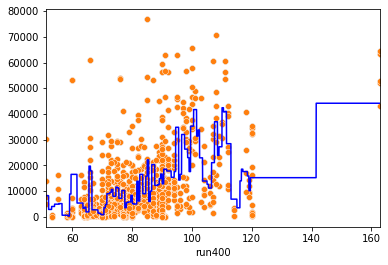

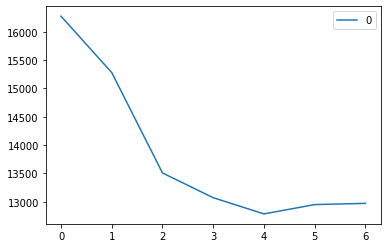

In [55]:
full_knn('run400')

5

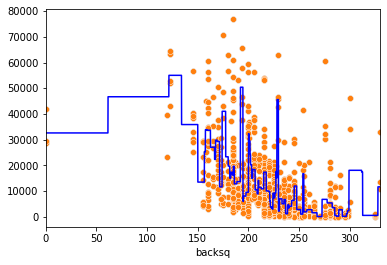

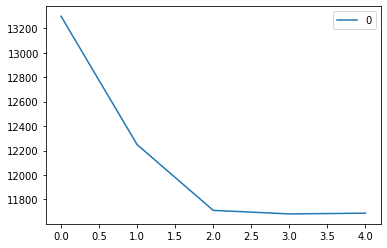

In [56]:
full_knn('backsq')


3

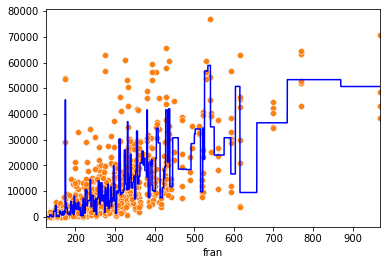

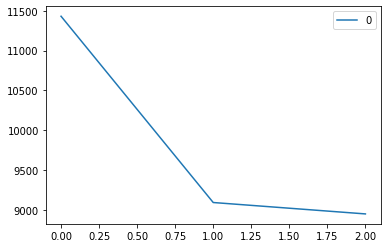

In [57]:
full_knn('fran')

5

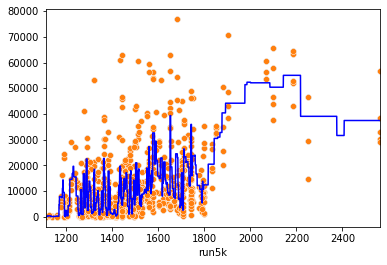

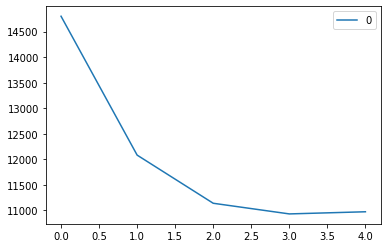

In [58]:
full_knn('run5k')

28

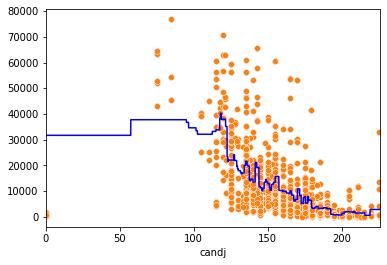

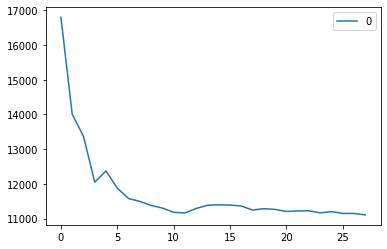

In [59]:
full_knn('candj')

40

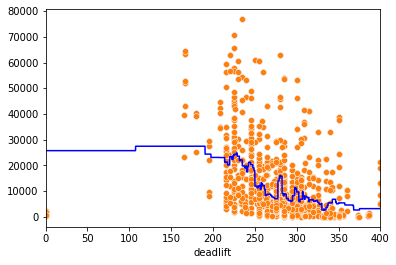

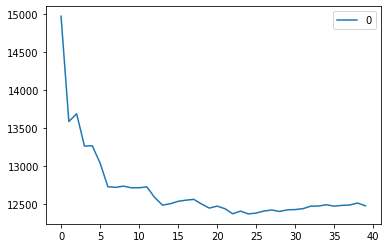

In [60]:
full_knn('deadlift')

2

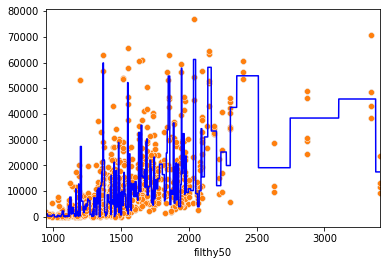

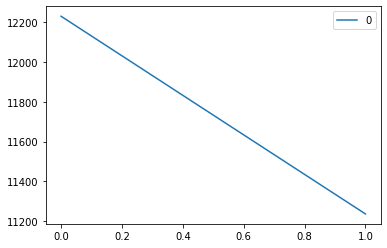

In [61]:
full_knn('filthy50')

Subsetted for Females
Using a Subset of Predictors
(helen, grace, fran, pullups, backsq)
RMSE value for k=  1 is: 10779.56435165302
RMSE value for k=  2 is: 8334.719869660545
RMSE value for k=  3 is: 8416.122400299642
RMSE value for k=  4 is: 8629.225886413567
RMSE value for k=  5 is: 8953.778757961038
RMSE value for k=  6 is: 9084.691293608095
RMSE value for k=  7 is: 9163.735746801147
RMSE value for k=  8 is: 9300.522163209343
RMSE value for k=  9 is: 9548.05962001928
RMSE value for k=  10 is: 9749.583958845189
RMSE value for k=  11 is: 9902.468850070247
RMSE value for k=  12 is: 10082.084552897079
RMSE value for k=  13 is: 10165.705227465332
RMSE value for k=  14 is: 10212.13000299097
RMSE value for k=  15 is: 10249.437933187377
RMSE value for k=  16 is: 10240.526850280554
RMSE value for k=  17 is: 10250.563594034405
RMSE value for k=  18 is: 10337.985343957416
RMSE value for k=  19 is: 10326.40236301649
RMSE value for k=  20 is: 10313.73019594269


<AxesSubplot:>

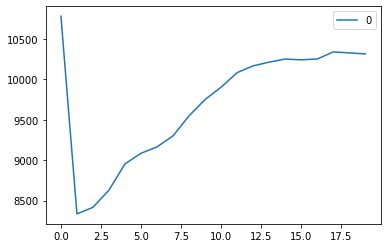

In [62]:
# Different approaches to subset the data to use different
# columns to train and test on

# Use this if you want to subset by the column number
#df1 = X.iloc[:, ]

# Use this if you want to subset by column names
cols = ['helen','grace','fran','pullups', 'backsq']
df1 = X[cols]
#df1.head()
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size = .3, random_state=801)
X_train.reset_index()

print("Subsetted for Females")
print("Using a Subset of Predictors")
print("(helen, grace, fran, pullups, backsq)")

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [63]:
# This code chunk allows you to select which columns
# you would like the knn to be trained on to predict
# and then it will use a for loop to iterate through
# the different values of nearest neighbors from 1-10
num_neighbors = 10
#candj, fran, filthy50
#cols = ['helen','grace','fran']
#df1 = X.iloc[:, ]
#df1 = X[cols]
#df1.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=801)
X_train.reset_index()

acc_val = [] #to store accuracy values for different L
for N in range(num_neighbors):
    N = N+1
    pipe = PipeKNN(N)
    pipe.fit(X_train,y_train)
    print('Score:', pipe.score(X_test, y_test), ' N:', N)
    acc_val.append(pipe.score(X_test, y_test)) #store accuracy values

#param_grid = [{'kneighborsregressor__n_neighbors': list(np.arange(1,50))}] 
#gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error')
#gs.fit(X_train, y_train)
print(gs.best_params_)


# Some of the best results for accuracy (still fairly low)
# First 100 columns - Score: 0.5433629491409262, L: 4

# cols = ['candj', 'fran', 'filthy50'],
# Score: 0.561768090617294  N: 5

# cols = ['helen','grace','fran']
# Score: 0.5623927641302024  N: 5




Score: 0.6196088344374839  N: 1
Score: 0.6588478895332771  N: 2
Score: 0.6801925731704048  N: 3
Score: 0.6934189098470587  N: 4
Score: 0.6794600250721756  N: 5
Score: 0.6568718087132206  N: 6
Score: 0.6228342333176484  N: 7
Score: 0.6157619636748075  N: 8
Score: 0.5984472027742777  N: 9
Score: 0.5868942077702766  N: 10
{'decisiontreeregressor__max_depth': 16}


In [64]:
# Redefining
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size = .3, random_state=801)
X_train.reset_index()

# Lowest K value is 2
model = KNeighborsRegressor(n_neighbors = 2)

# Fit the model
model.fit(X_train, y_train)  #fit the model

# Preds
pred=model.predict(X_test) #make prediction on test set

# RMSE
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse

print(error) # 8334.7198

8334.719869660545


In [65]:
# Define all of our RMSE
KnnMSE = error
DtMSE = sqrt(mse)
BagMSE = sqrt(BagMSE)

In [66]:
model_names = []
RMSE = []

In [67]:
# Append our different models
model_names.append("Decision Tree")
model_names.append("Bagging")
model_names.append("K-Nearest-Neighbors")

# Append our different scores
RMSE.append(DtMSE)
RMSE.append(BagMSE)
RMSE.append(KnnMSE)

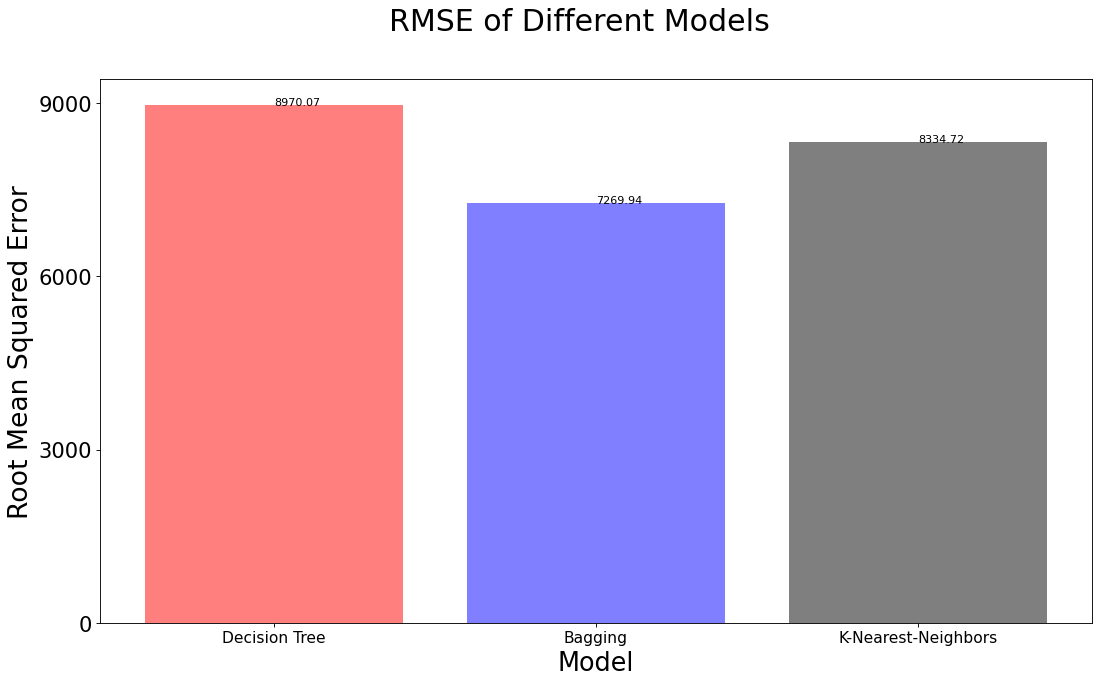

In [68]:
# All the modules we need for plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

# Define the figure
fig = figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')

# Tick marks / aesthetics
y_pos = np.arange(len(model_names))
plt.xticks(range(len(model_names)), model_names, fontsize=14)
plt.yticks([0,3000, 6000,9000,12000,15000], (0,3000, 6000,9000,12000,15000), fontsize=19)
colors =['r','b','k','y','m','c']

# Label size and bars
plt.rcParams['xtick.labelsize'] = 20 
barlist = plt.bar(y_pos, RMSE, color=colors, align='center', alpha=0.5)

# Labels
plt.ylabel('Root Mean Squared Error', size = 24)
plt.xlabel("Model", size = 23)

# Title
plt.suptitle('RMSE of Different Models', size = 27)
A = range(len(RMSE))

# Annotate the scores
for xy in zip(A, RMSE):                                     
    plt.annotate('%0.2f' % xy[1], xy = xy, textcoords='data') 

# Show everything
plt.show()